In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn import metrics
%matplotlib inline


/Users/shivanikohli/Documents/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
dfTest = pd.read_csv('rawData.csv')
df = pd.read_csv('Fortnite.csv')
#df = df.rename(index=str, columns={"Which quadrant did you land in? Use map below for reference": "Location", "Which game mode were you in?": "Mode","What place did you finish? (Example: 4)": "Position", "How many kills did you get? (Example: 7)": "KillCount"})

In [3]:
df.head()

,Timestamp,Location,Mode,Position,KillCount
0,2018/03/05 7:16:09 PM EST,D5,Solo,6,8
1,2018/03/05 7:43:32 PM EST,G2,Solo,1,3
2,2018/03/05 7:44:48 PM EST,F8,Solo,6,3
3,2018/03/05 8:00:04 PM EST,D10,Solo,60,1
4,2018/03/05 8:00:05 PM EST,G8,Solo,1,8


In [4]:
df = df.drop('Timestamp', axis = 1)

In [5]:
df.isnull().any()

Location     False
Mode         False
Position     False
KillCount    False
dtype: bool

In [6]:
df = df[["Location", "KillCount", "Position", "Mode"]]

# df["KillCount"] = np.cos(2*np.pi*df.KillCount/100)
# df["Position"] = np.cos(2*np.pi*df.Position/100)
# df["Mode"] =  np.cos(2*np.pi*df.Position/3)

In [7]:
df.loc[df["KillCount"] > 82]

,Location,KillCount,Position,Mode


In [8]:
df3 = pd.concat([df, dfTest])

In [9]:
df =df3

In [10]:
df.Mode.replace(to_replace=dict(SOLO=0, DUO=1, SQUAD=2, Solo=0, Duo =1, Squad = 2), inplace=True)
dfTest.Mode.replace(to_replace=dict(SOLO=0, DUO=1, SQUAD=2, Solo=0, Duo =1, Squad = 2), inplace=True)

In [11]:
df.head()


,Location,KillCount,Position,Mode
0,D5,8,6,0
1,G2,3,1,0
2,F8,3,6,0
3,D10,1,60,0
4,G8,8,1,0


In [17]:
df=df.drop([76])

In [18]:
df.loc[df['Mode'] == "SQUAD "]

,Location,KillCount,Position,Mode


(-1, 10)

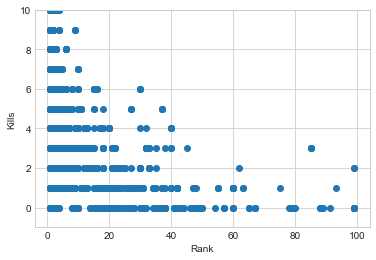

In [19]:
import seaborn as sns
sns.set_style(style = "whitegrid")
plt.scatter((df["Position"]),(df["KillCount"]))
# plt.ylabel()
plt.xlabel("Rank")
plt.ylabel("Kills")
plt.ylim(-1,10)


Text(0.5,0,'Mode')

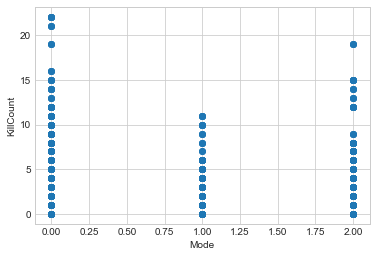

In [20]:
plt.scatter(df["Mode"], df["KillCount"])
plt.ylabel("KillCount")
plt.xlabel("Mode")

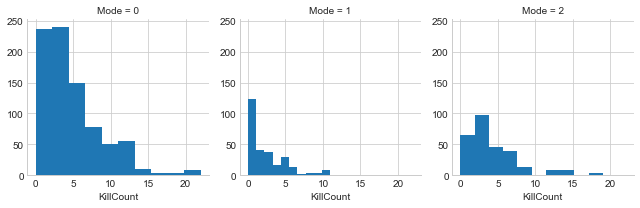

In [21]:
sns.set_style("whitegrid")
multiples = sns.FacetGrid(df, col = "Mode")
multiples = multiples.map(plt.hist, "KillCount")

Text(0.5,0,'Location')

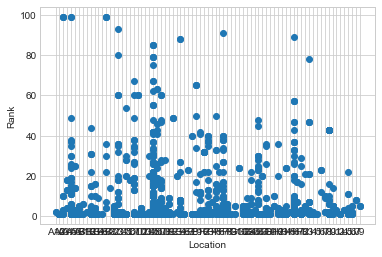

In [22]:
plt.scatter( df["Location"],df["Position"])
plt.ylabel("Rank")
plt.xlabel("Location")

In [23]:
df.describe()

,KillCount,Position
count,1397.000000,1397.000000
mean,4.231926,10.384395
std,3.718502,16.630412
min,0.000000,1.000000
25%,2.000000,1.000000
50%,3.000000,3.000000
75%,6.000000,12.000000
max,22.000000,99.000000


In [17]:
# multiples = sns.FacetGrid(df, col = "Location")
# multiples = multiples.map(plt.hist, "Position")

In [25]:
X = df["KillCount"]
Y = df["Position"]

# m1 = sm.OLS(Y,X).fit()

# fig, ax = plt.subplots(figsize=(15,10))
# fig = sm.graphics.plot_fit(m1, 0, ax=ax)


In [26]:
import sklearn.cross_validation
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,Y, test_size = 0.2, random_state = 5) 

In [27]:
from scipy.optimize import curve_fit

In [28]:
def func(x, a, b, c):
    d  = np.array(a * np.exp(-b * x) + c, dtype=np.float64)
    return d

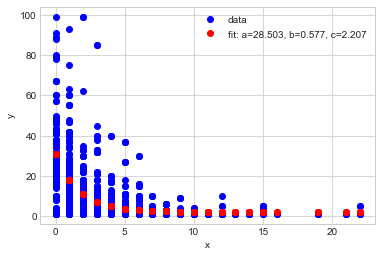

In [29]:
plt.plot(X_train, Y_train, 'bo', label='data')
popt, pcov = curve_fit(func, X_train, Y_train)
plt.plot(X_train, func(X_train, *popt), 'ro',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [31]:
yhat = popt[2]+ popt[0]*np.exp(-popt[1] * 2)

In [32]:
res = yhat -Y_test

In [43]:
yhat

11.200677873064949

In [33]:
np.mean(res)

-0.6564649840779051

In [36]:
popt

array([28.50269828,  0.57674445,  2.20710799])

(-1, 10)

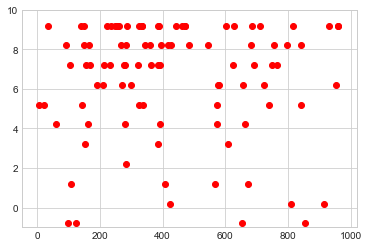

In [37]:
plt.plot(res,'ro')
plt.ylim(-1,10)

In [38]:
relativeRes = res/Y_test

(-1, 1.5)

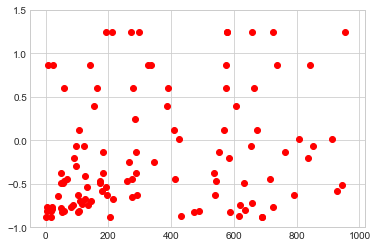

In [39]:
plt.plot(relativeRes,'ro')
plt.ylim(-1,1.5)

In [40]:
np.mean(relativeRes)

4.746354670871014

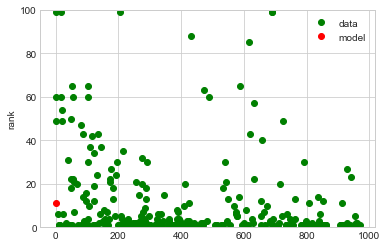

In [42]:
plt.plot(Y_test, 'go', label = 'data')
plt.plot(yhat, 'ro', label = 'model')
plt.ylim(0,100)
plt.ylabel('rank')
plt.legend()

In [171]:
np.max(yhat)

33.154988461472144